In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/PHODO/Segmentation Model/Mask_RCNN-TF2
!pwd

/gdrive/My Drive/PHODO/Segmentation Model/Mask_RCNN-TF2
/gdrive/My Drive/PHODO/Segmentation Model/Mask_RCNN-TF2


- tensorfolw, tensorflow-gpu version == 2.5.0
=> 텐서플로우 2.5 이상인 경우우 detect error 발생
- numpy version == 1.20  




!pip install tensorflow==2.5.0  
!pip install tensorflow-gpu==2.5.0  
!pip install numpy==1.20.0  
!pip install pycocotools==2.0.0



In [ ]:
!pip install tensorflow==2.5.0
!pip install tensorflow-gpu==2.5.0
!pip install numpy==1.20.0
!pip install pycocotools==2.0.0

In [ ]:
import numpy as np
import pandas as pd

import os
import sys
from tqdm import tqdm
from pathlib import Path
import tensorflow as tf
import skimage.io
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
print(tf.__version__)
print(np.__version__)
print(pd.__version__)

2.11.0
1.22.4
1.4.4


In [ ]:
# Root directory of the project
ROOT_DIR = os.path.abspath("/gdrive/My Drive/PHODO/Segmentation Model/Mask_RCNN-TF2")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
from samples.coco import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

In [ ]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Create Model and Load Trained Weights

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
Use fn_output_signature instead


In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']



## Run Object Detection

In [ ]:
!pip install pillow_heif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Processing 1 images
image                    shape: (4032, 3024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 4032.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[array([[3956.5, 2204. ],
       [3956.5, 2203. ],
       [3956.5, 2202. ],
       ...,
       [3955.5, 2205. ],
       [3956. , 2204.5],
       [3956.5, 2204. ]])]
[array([[1838.5,   42. ],
       [1838. ,   41.5],
       [1837.5,   41. ],
       [1837. ,   40.5],
       [1836.5,   41. ],
       [1836.5,   42. ],
       [1836.5,   43. ],
       [1837. ,   43.5],
       [1837.5,   43. ],
       [1838. ,   42.5],
       [1838.5,   42. ]]), array([[2001.5,   76. ],
       [2001.5,   75. ],
       [2001.5,   74. ],
       ...,
       [2000.5,   77. ],
       [2001. ,   76.5],
       [2001.5,   

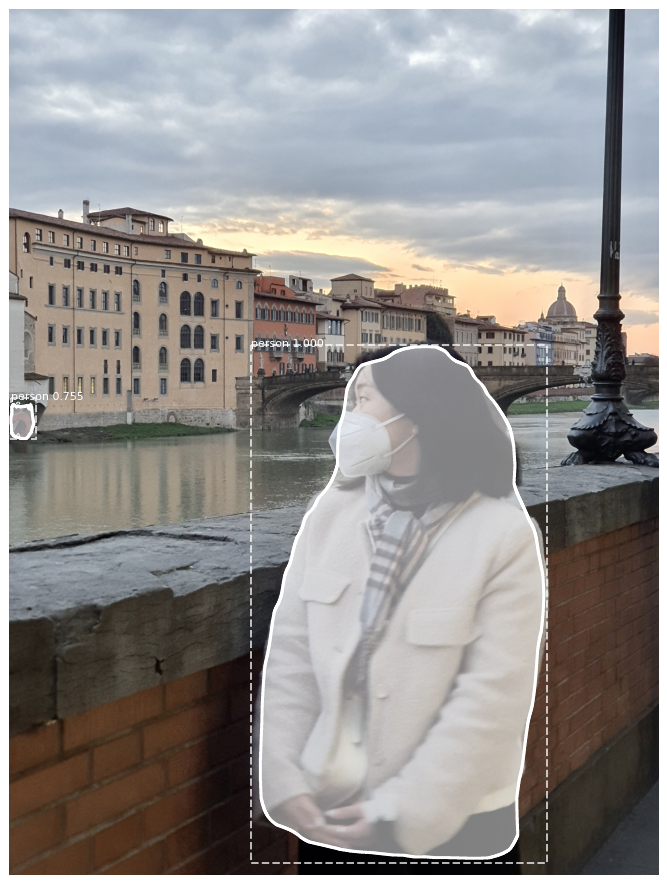

In [ ]:
import random
from PIL import Image
#import pillow_heif

# Load a random image from the images folder
#file_names = next(os.walk(IMAGE_DIR))[2]
#image = random.choice(file_names)
#image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = skimage.io.imread(os.path.join(IMAGE_DIR, "IMG_4294.JPG"))


# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
#print(r['class_ids'])
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [ ]:
FOLDERNAME = '/gdrive/My Drive/PHODO/Segmentation Model/Mask_RCNN-TF2/'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd /content/drive/My\ Drive/
%ls

%cp -r $FOLDERNAME ../../
%cd ../../